<a href="https://colab.research.google.com/github/Vizer/kaggle/blob/main/src/titanic/titanic_tutorial_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
prod = False

# Tools

In [235]:
def visualizeAgainstSurvived(column, data):
  fig, axs = plt.subplots(figsize=(30, 10))
  sns.countplot(x=column, hue='Survived', data=data)

  plt.xlabel(column, size=1, labelpad=1)
  plt.ylabel('Survived', size=1, labelpad=1)
  plt.tick_params(axis='x', labelsize=10)
  plt.tick_params(axis='y', labelsize=10)

  plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
  plt.title('Count of Survival in {} Feature'.format(column), size=15, y=1.05)

  plt.show()

In [236]:
def show_correlation(data):
  print(data.corr(numeric_only=True)["Survived"].sort_values(ascending=False))

# Get Data

In [237]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# https://www.youtube.com/watch?v=yEXkEUqK52Q

def load_competition_data(
      competition,
      drive_path='/content/drive',
      kaggle_json_path='/content/drive/MyDrive/Docs/kaggle/kaggle.json'):
    import shutil
    import os
    import zipfile
    from google.colab import drive
    from pathlib import Path

    KAGGLE_DESTINATION = "/root/.kaggle"
    KAGGLE_JSON_DESTINATION = f"{KAGGLE_DESTINATION}/kaggle.json"
    DATA_DESTINATION = f'/content/{competition}'

    data_path = Path(f"{competition}.zip")

    if data_path.is_file():
      print('Kaggle competition data is already available at', data_path.absolute())
      return None

    drive.mount(drive_path, readonly=True)

    Path(KAGGLE_DESTINATION).mkdir(parents=True, exist_ok=True)

    shutil.copy(kaggle_json_path, KAGGLE_JSON_DESTINATION)

    os.chmod(KAGGLE_JSON_DESTINATION, 600);

    import kaggle
    kaggle.api.competition_download_cli(competition)

    with zipfile.ZipFile(data_path, 'r') as zip_ref:
      zip_ref.extractall(DATA_DESTINATION)

    drive.flush_and_unmount()

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

load_competition_data('titanic')

TRAIN_DATA_FILE_PATH = '/content/titanic/train.csv'
TEST_DATA_FILE_PATH = '/content/titanic/test.csv'
SUBMISSION_FILE_PATH = '/content/titanic/my_submission.csv'

Kaggle competition data is already available at /content/titanic.zip


In [239]:
train_data = pd.read_csv(TRAIN_DATA_FILE_PATH)
train_labels = train_data['Survived']

if prod:
  test_data = pd.read_csv(TEST_DATA_FILE_PATH)
else:
  train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.33, random_state=42)

# Explore

## General info

In [240]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Survived     596 non-null    int64  
 2   Pclass       596 non-null    int64  
 3   Name         596 non-null    object 
 4   Sex          596 non-null    object 
 5   Age          478 non-null    float64
 6   SibSp        596 non-null    int64  
 7   Parch        596 non-null    int64  
 8   Ticket       596 non-null    object 
 9   Fare         596 non-null    float64
 10  Cabin        134 non-null    object 
 11  Embarked     595 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


In [241]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,596.000000,596.000000,596.000000,478.000000,596.000000,596.000000,596.000000
mean,448.508389,0.372483,2.337248,29.525983,0.577181,0.374161,31.912786
std,259.457226,0.483872,0.823207,14.457437,1.229504,0.807072,51.480961
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,2.000000,20.250000,0.000000,0.000000,7.925000
50%,459.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,676.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [242]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [243]:
show_correlation(train_data)

Survived       1.000000
Fare           0.237079
Parch          0.068585
PassengerId    0.004205
SibSp         -0.054055
Age           -0.061776
Pclass        -0.311678
Name: Survived, dtype: float64


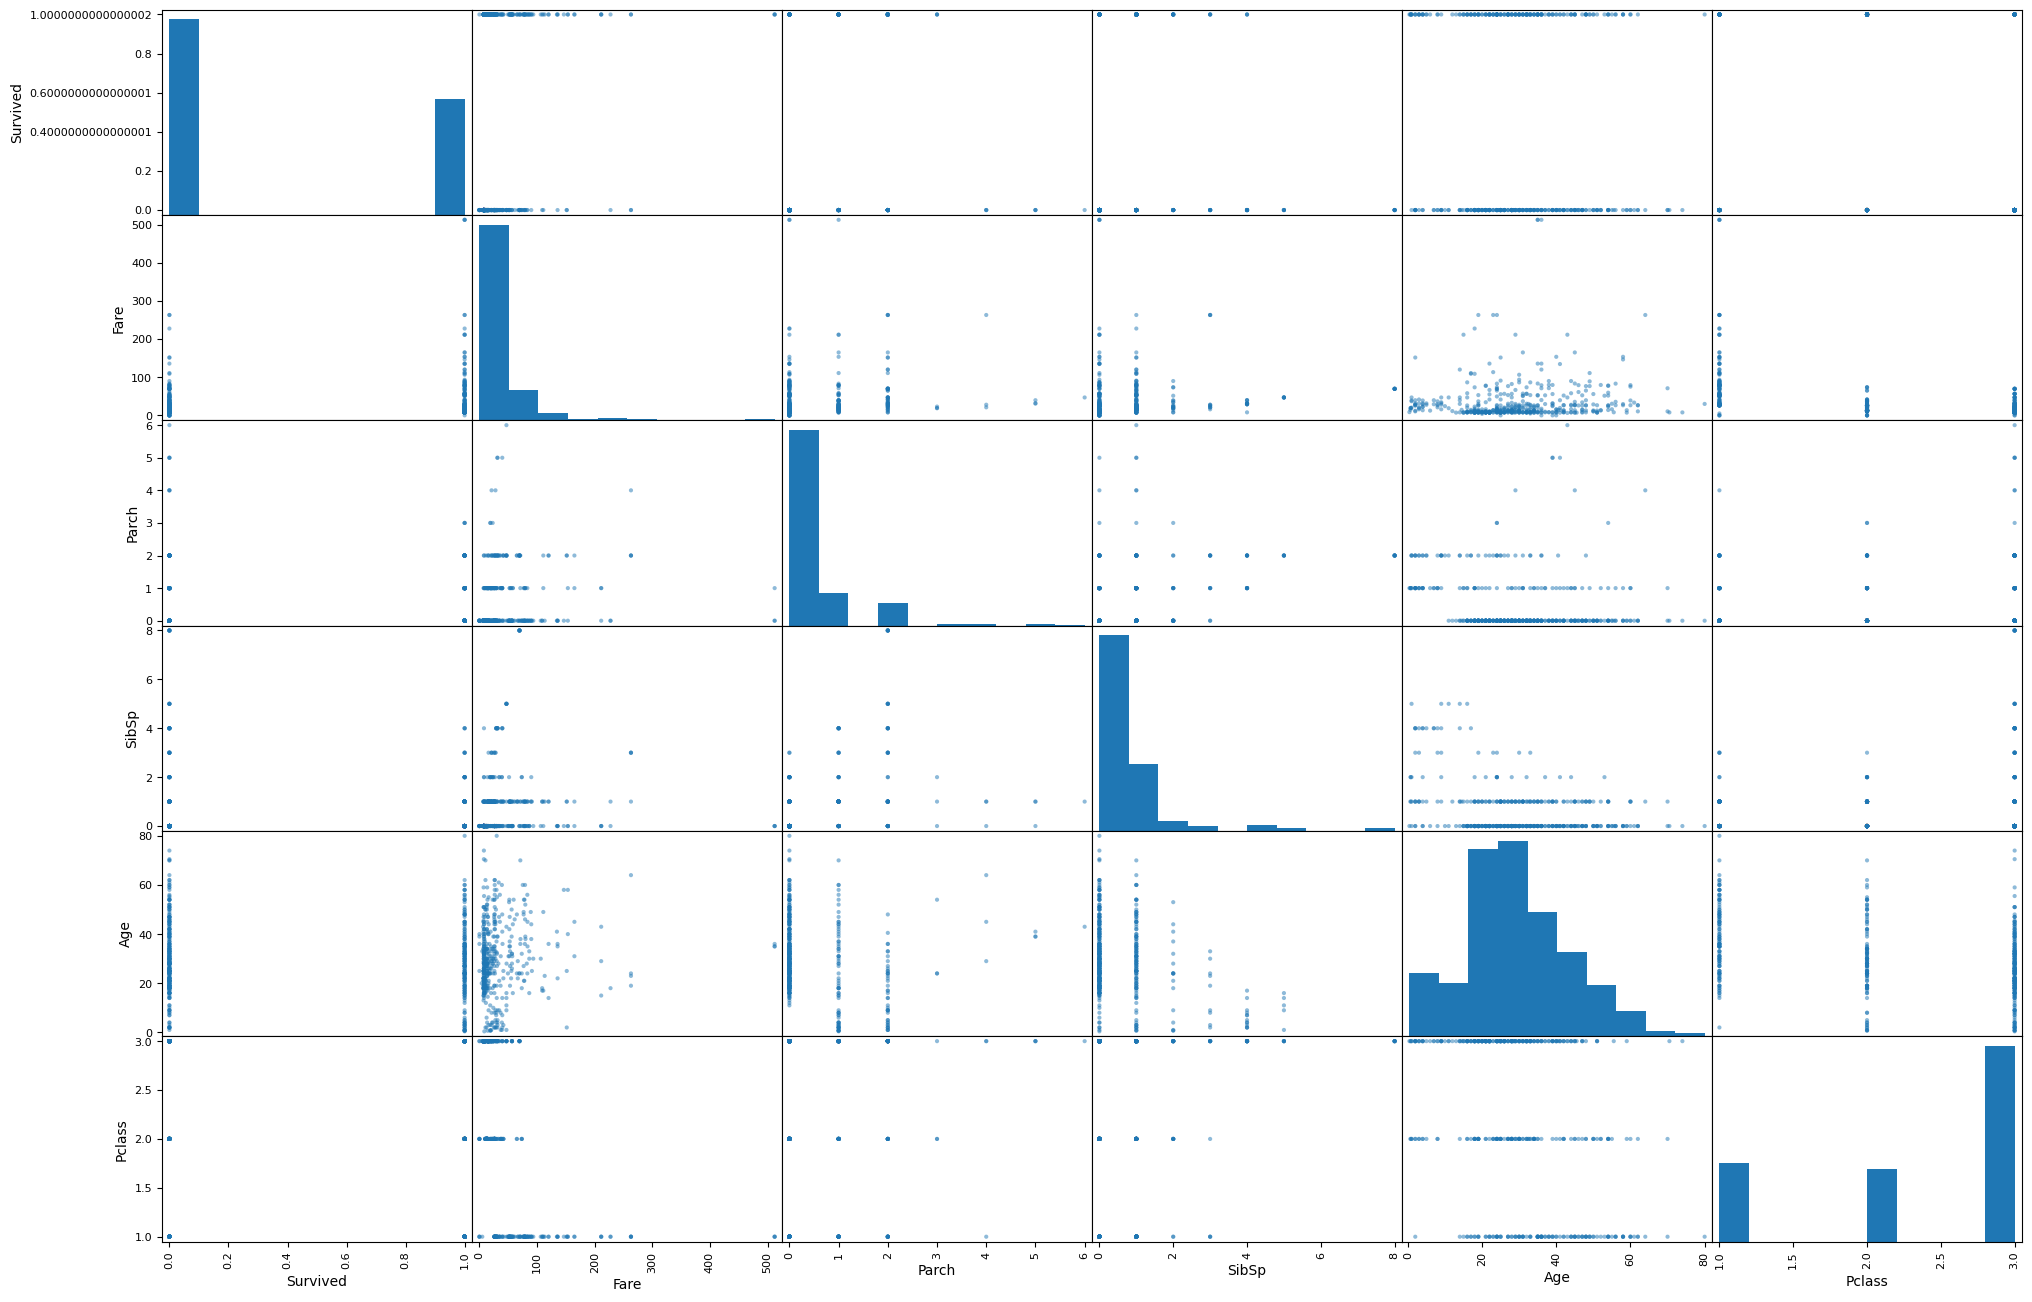

In [244]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Parch", "SibSp", "Age","Pclass", "Sex"]
scatter_matrix(train_data[attributes], figsize=(24,16))

plt.show()

## Visualizations

### SibSp

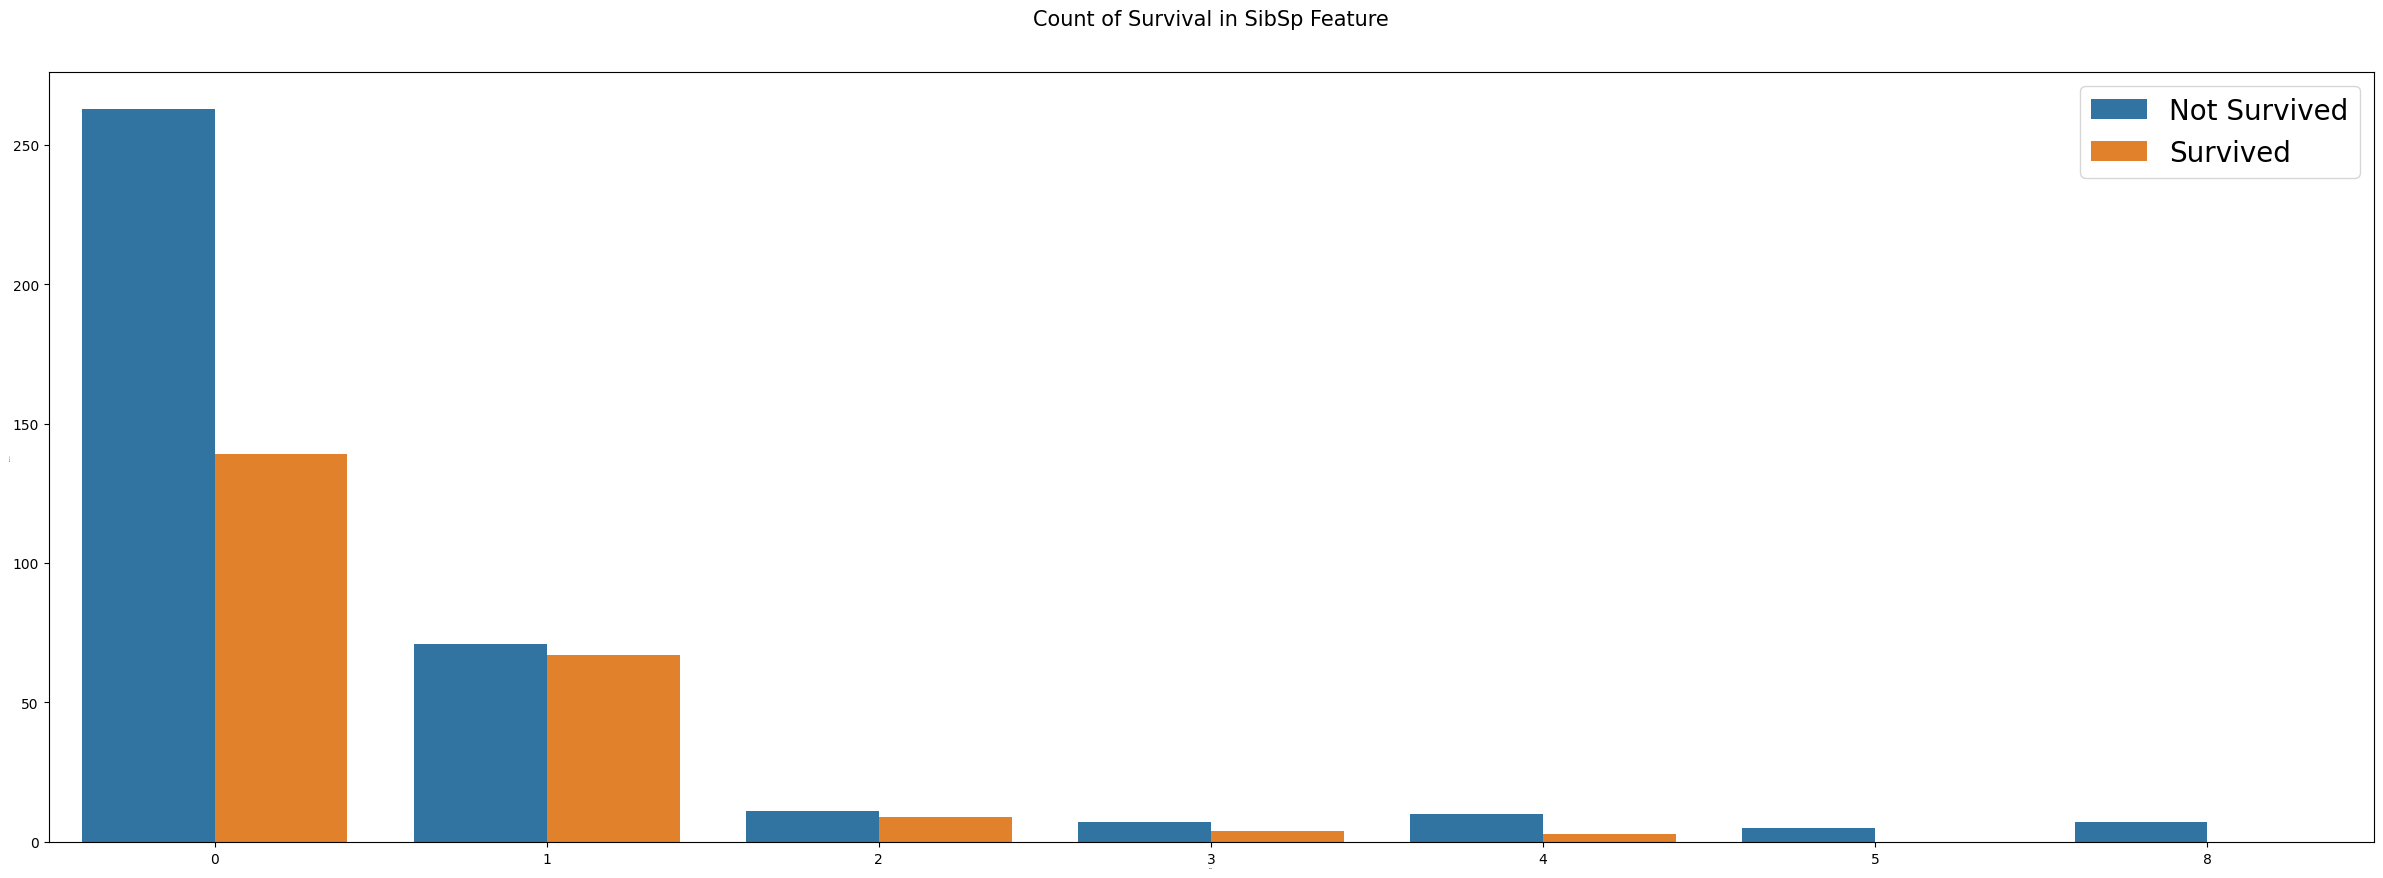

In [245]:
visualizeAgainstSurvived('SibSp', train_data)

### Parch

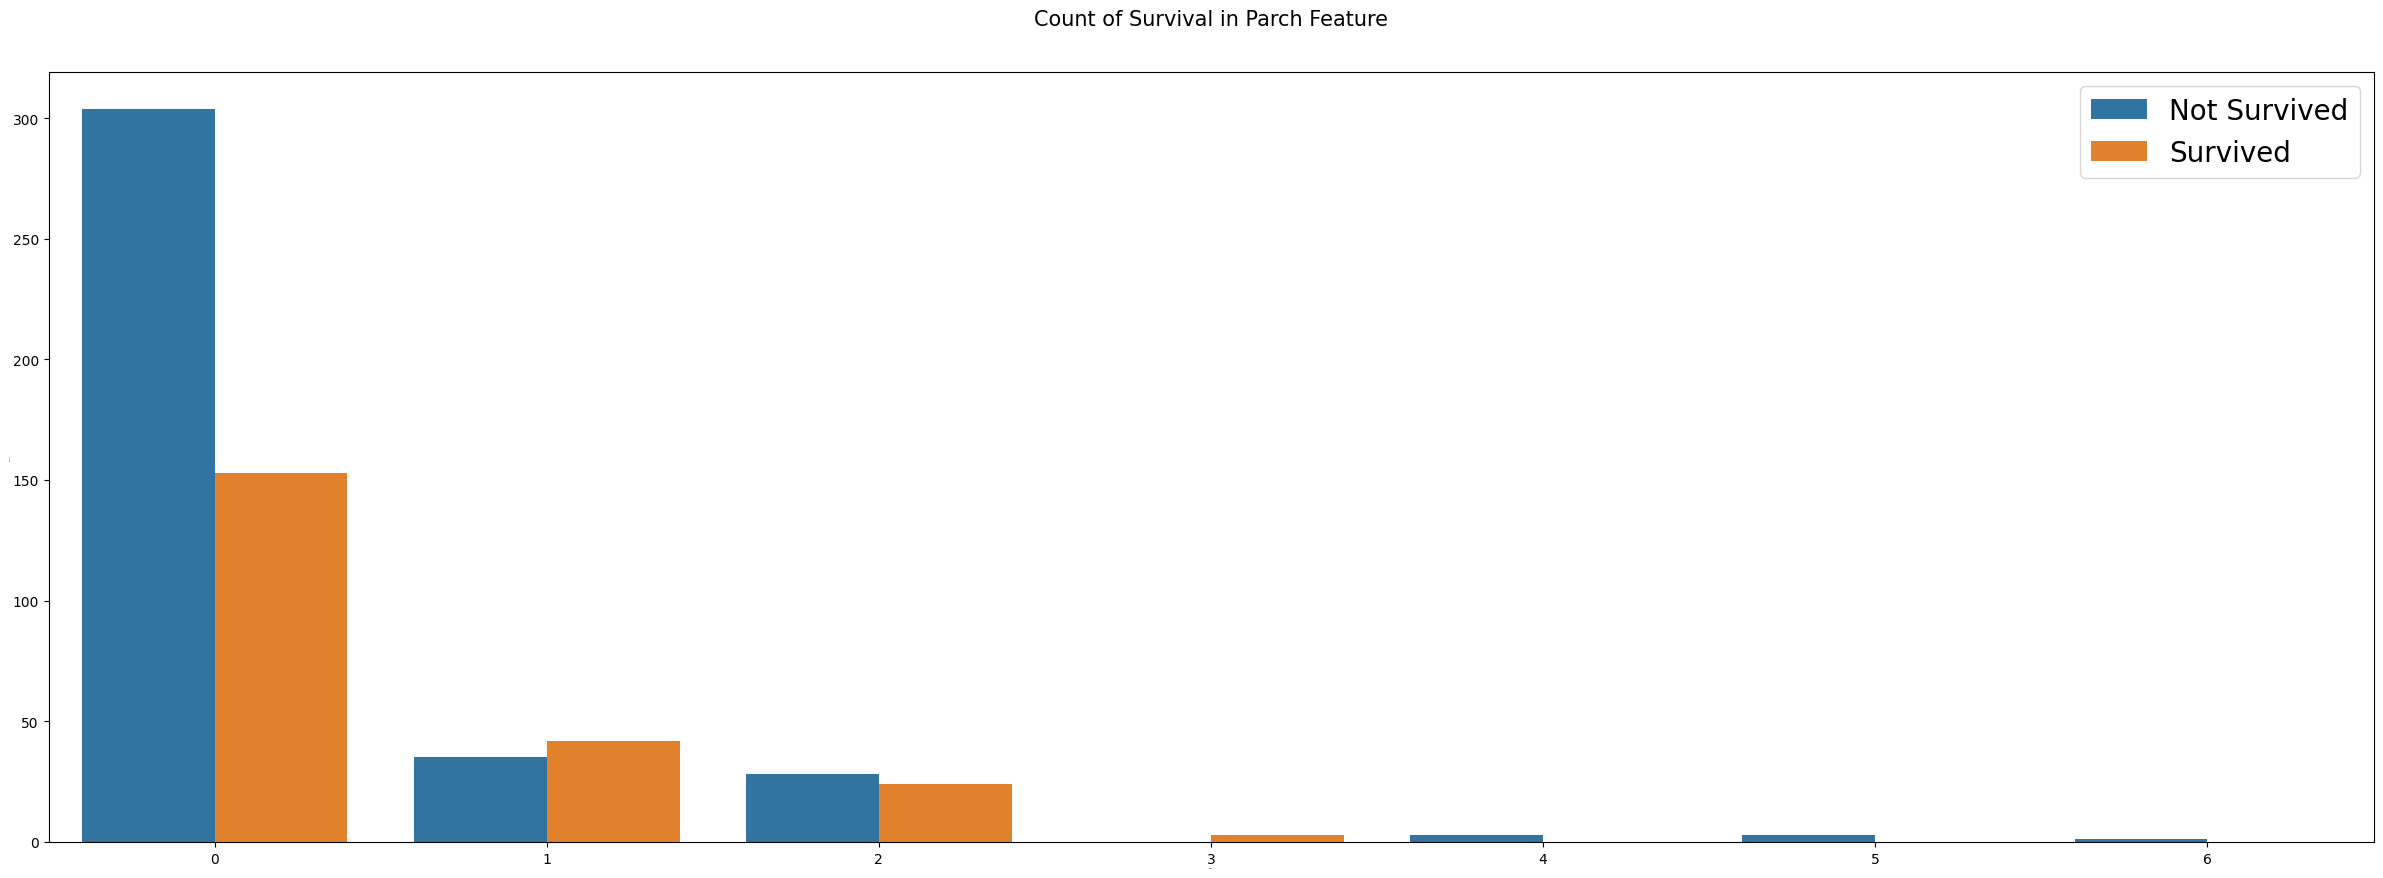

In [246]:
visualizeAgainstSurvived('Parch', train_data)

### Age

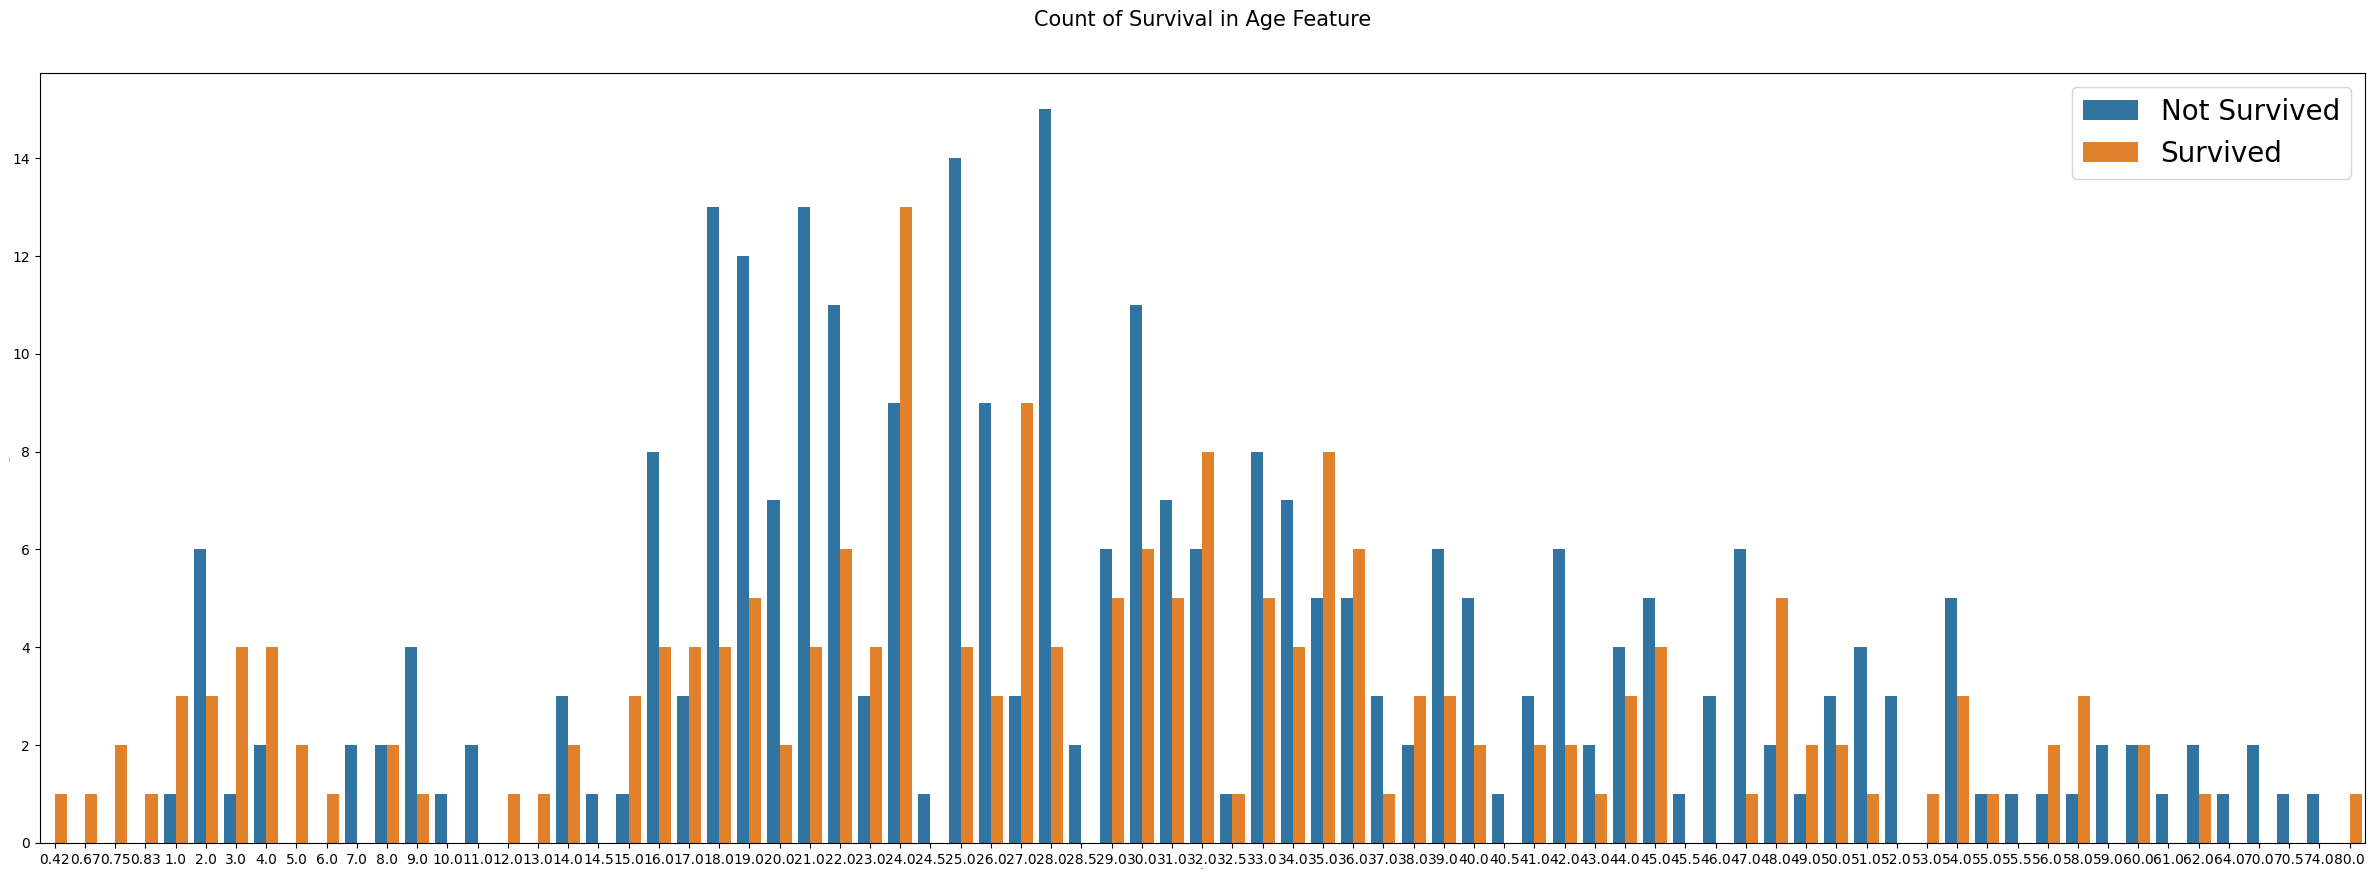

In [247]:
visualizeAgainstSurvived('Age', train_data)

### Embarked

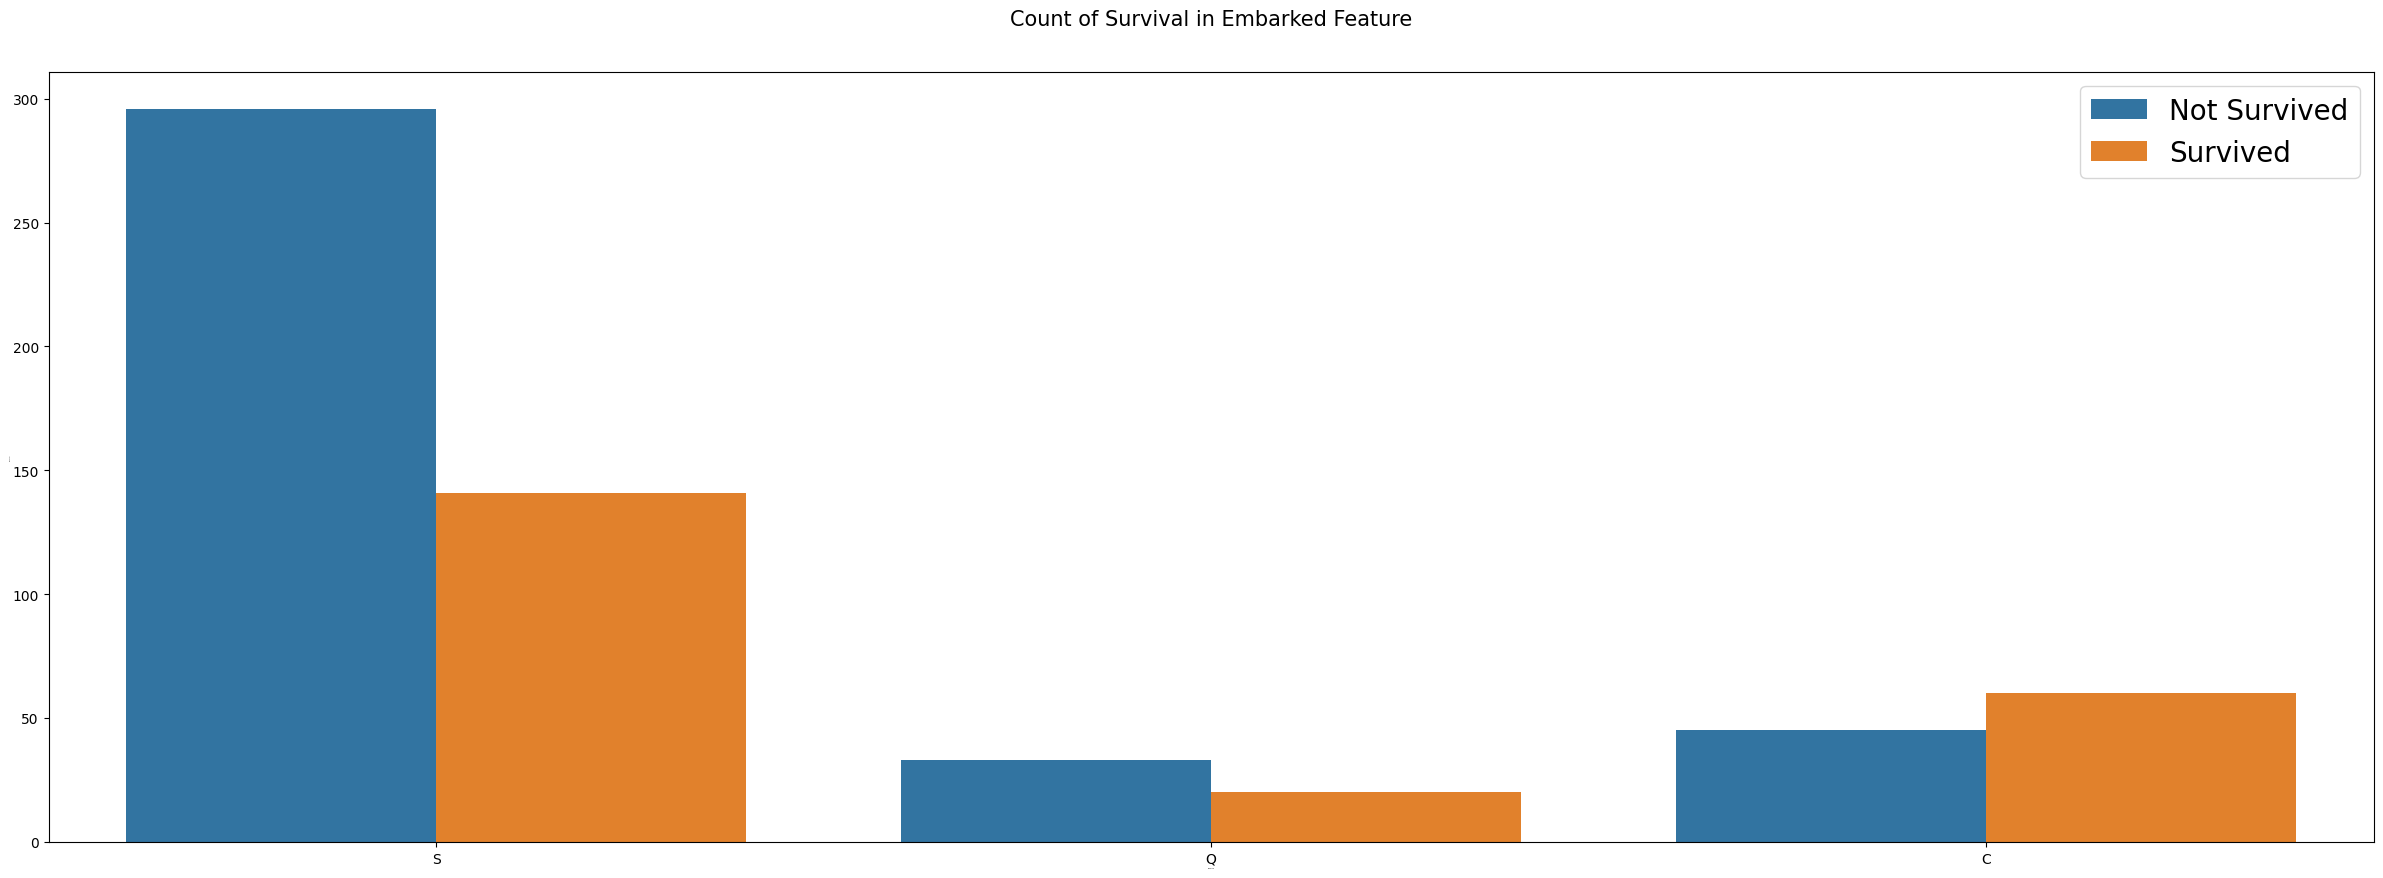

In [248]:
visualizeAgainstSurvived('Embarked', train_data)

### Cabin/Deck

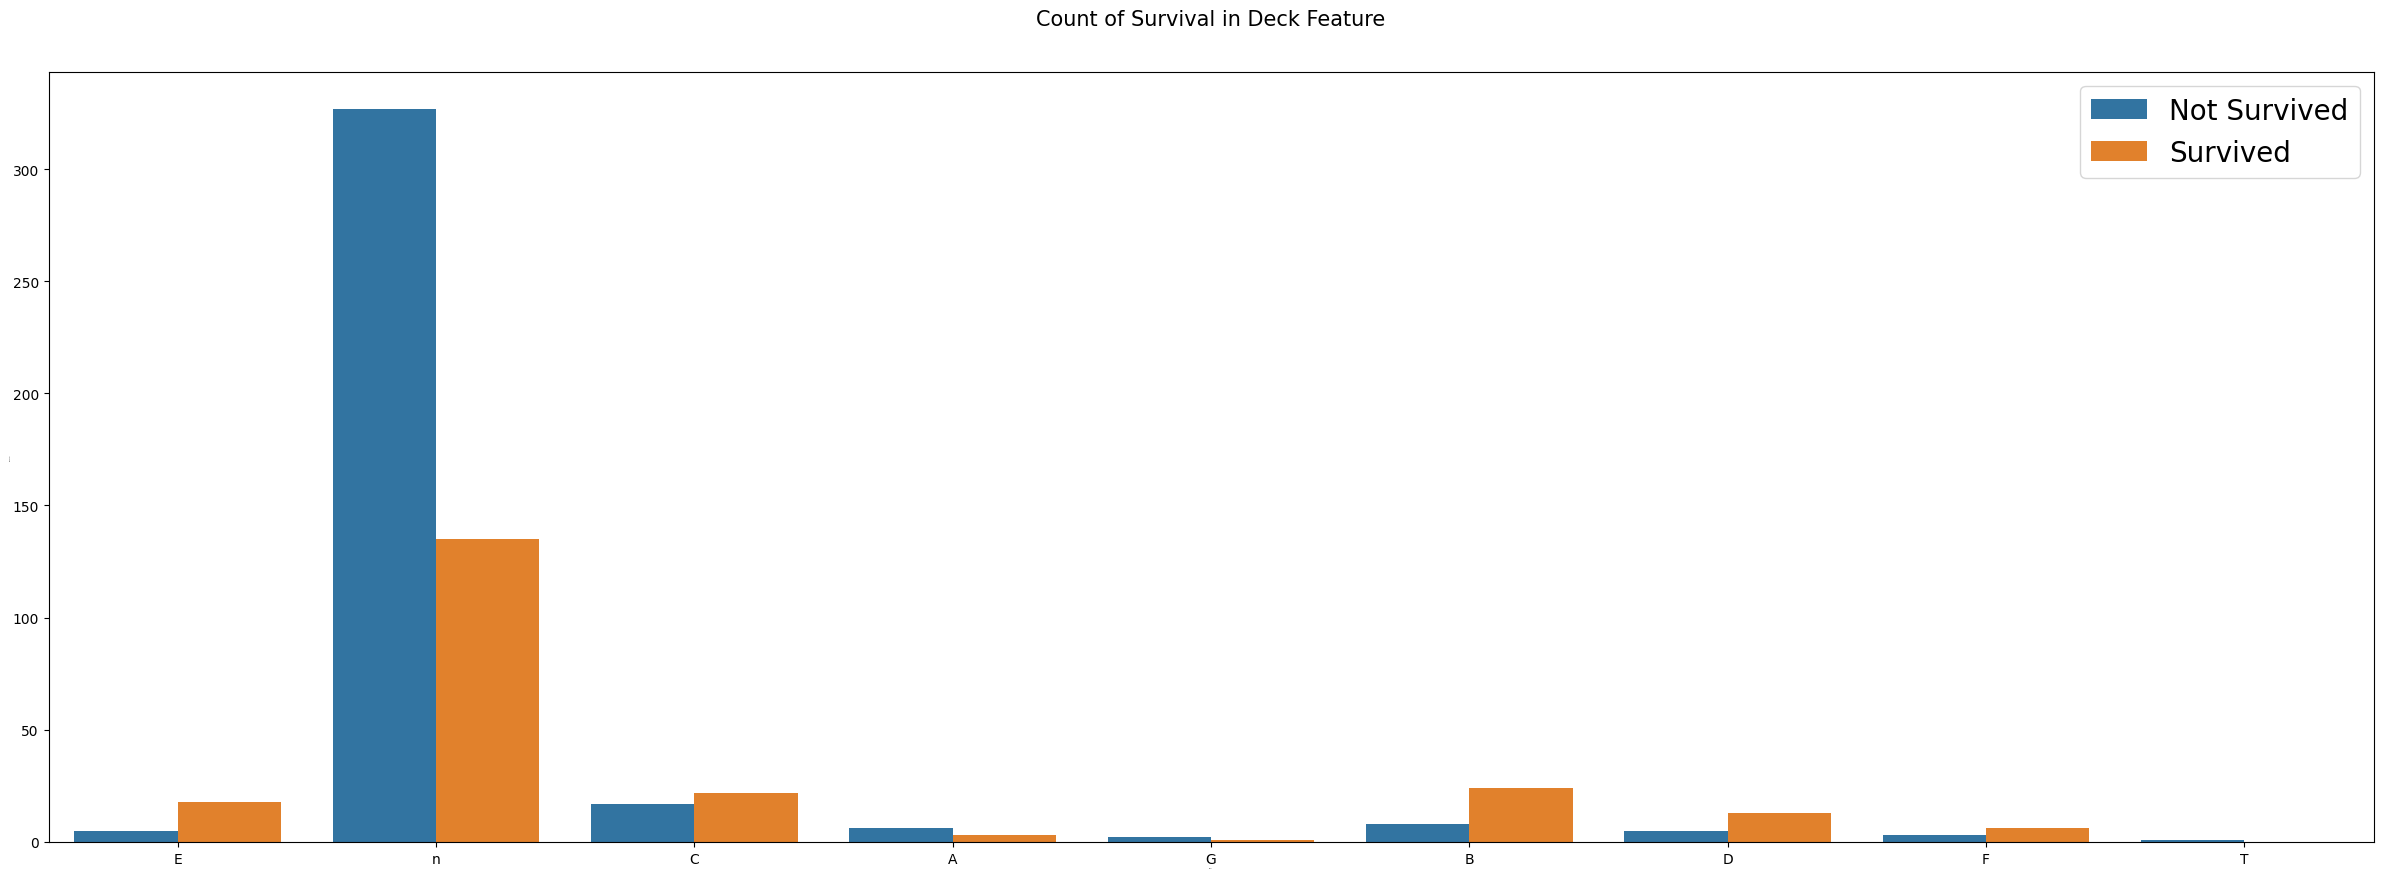

In [249]:
decks = train_data['Cabin'].astype(str).str[0]
decka_data = pd.DataFrame({"Survived": train_data['Survived'],"Deck": decks})
visualizeAgainstSurvived('Deck', decka_data)

## Deck(Embarked, Pclass)

In [250]:
train_data.groupby(['Embarked','Pclass'])[['PassengerId','Fare','Cabin']].agg({'PassengerId': ['count'], 'Fare': ['mean'],'Cabin':['count','unique']})

PassengerId        Fare Cabin  \
                      count        mean count   
Embarked Pclass                                 
C        1               49  105.261310    39   
         2               13   27.723085     1   
         3               43   10.820840     1   
Q        1                1   90.000000     1   
         2                2   12.350000     1   
         3               50   11.760500     1   
S        1               84   74.287154    73   
         2              110   19.972045     8   
         3              243   15.706787     8   

                                                                    
                                                            unique  
Embarked Pclass                                                     
C        1       [C92, E50, nan, B41, B18, C50, A10, C49, C90, ...  
         2                                                [nan, D]  
         3                                            [nan, F E69]  
Q        1                                                   [C78]  
         2                                             [nan, E101]  
         3                                              [nan, F38]  
S        1       [E46, nan, A32, C128, E44, D35, E31, C2, C103,...  
         2                           [nan, F2, F33, F4, E101, D56]  
         3                      [nan, G6, E10, F G73, E121, F G63]

## Parch

In [251]:
parch_data = pd.DataFrame({'Survived':train_data['Survived'], 'Parch': train_data['Parch'].transform(lambda x: 0 if x < 1 else 1)})

show_correlation(parch_data)

Survived    1.000000
Parch       0.141359
Name: Survived, dtype: float64


## SibSp

In [252]:
sibsp_data = pd.DataFrame({'Survived':train_data['Survived'], 'SibSp': train_data['SibSp'].transform(lambda x: 0 if x < 1 else 1)})

show_correlation(sibsp_data)

Survived    1.000000
SibSp       0.079534
Name: Survived, dtype: float64


# Data preparation

## Pepielines setup

In [253]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, OneHotEncoder, MinMaxScaler, KBinsDiscretizer, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer

### Title pipeline

- Mrs - married
- Miss - unmarries
- Mme - madame == Mrs
- Mlle - Mademoiselle == Miss
- Ms - not indicate marital status
- Countess - middle noble
- Jonkheer - lowest noble
- Lady - he equivalent of lord, noble
- Master - for boys and young men

In [254]:
def extract_title(data, column):
    titleRegex = r'(Mr\.|Miss\.|Mrs\.|Master\.|Major\.|Dr\.|Capt\.|Rev\.|Don\.|Countess\.|Ms\.|Mme\.|Mlle\.|Col\.|Jonkheer\.|Dona\.|Lady\.|Sir\.)'
    titles = data[column].str.extract(titleRegex)
    titles = titles.replace(['Mme.', 'Dona.', 'Lady.','Countess.', 'Ms.'], 'Mrs.')
    titles = titles.replace(['Mlle.'], 'Miss.')

    titles = titles.replace(['Don.', 'Jonkheer.', 'Rev.', 'Capt.', 'Dr.', 'Major.', 'Col.','Sir.'], 'Mr.')

    return titles

In [255]:
title_pipeline = make_pipeline(FunctionTransformer(extract_title, kw_args={'column':'Name'}), OrdinalEncoder())

Survived    1.00000
Title      -0.03551
Name: Survived, dtype: float64


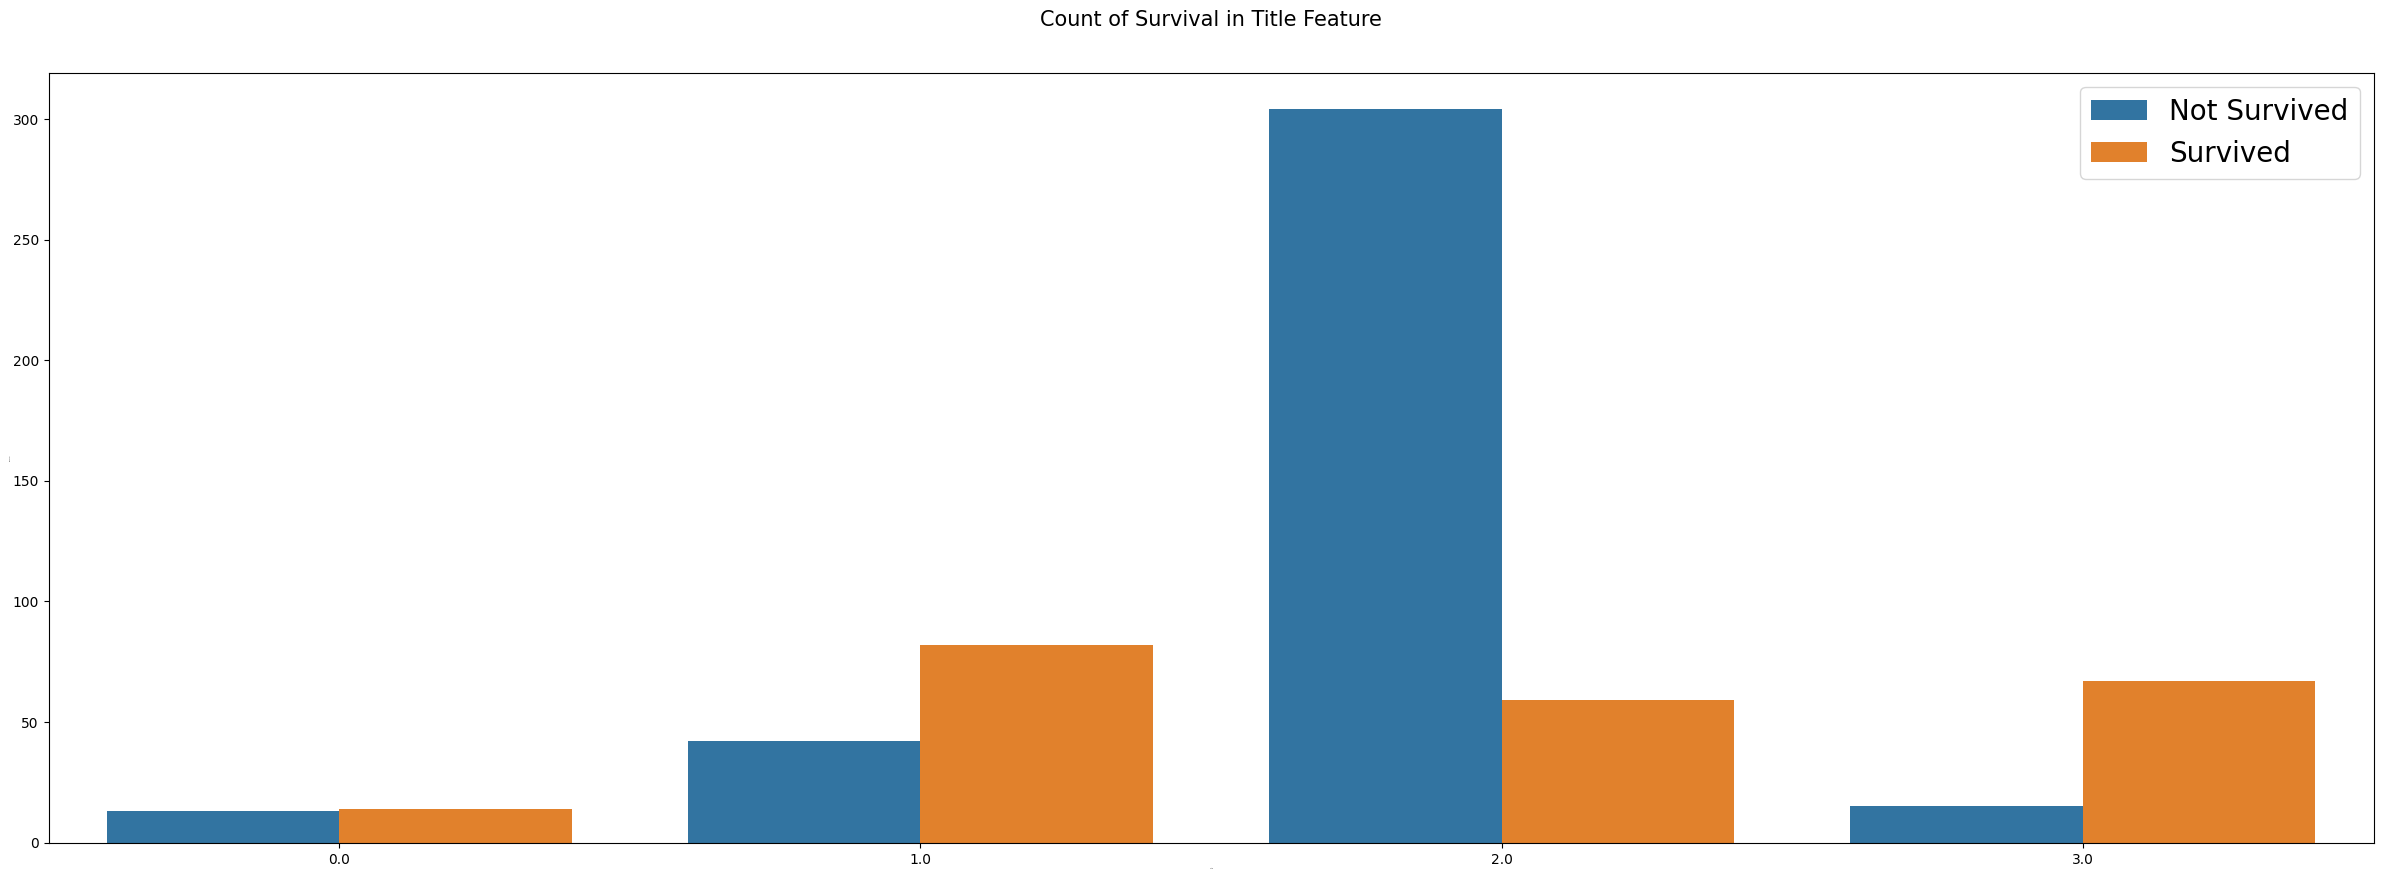

In [256]:
title_data_prepared = title_pipeline.fit_transform(train_data)

title_data_fr = pd.DataFrame({'Title': title_data_prepared.flatten(),'Survived': train_data['Survived'] },index=train_data.index)

show_correlation(title_data_fr)
visualizeAgainstSurvived('Title', title_data_fr)


### Relatives pipeline

In [257]:
def calc_relativies(data):
  return pd.DataFrame(data.apply(lambda x: 0 if x < 1 else 1))

In [258]:
relatives = make_pipeline(FunctionTransformer(calc_relativies, validate=False))

### Fare

In [259]:
fare_pipeline = make_pipeline(SimpleImputer(strategy='mean'), KBinsDiscretizer(9, strategy='quantile', encode='ordinal'))

### Age

In [260]:
age_pipeline = make_pipeline(KNNImputer(),KBinsDiscretizer(20, strategy='kmeans', encode='ordinal'))

### Pclass

In [261]:
pclass = make_pipeline(OneHotEncoder())

### Embarked

In [262]:
embarked = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder())

### Deck

In [263]:
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer

# todo: refactor to be generic group by inputer
class DeckImputer(SimpleImputer):
  def __init__(self, group_cols, target):
    assert type(group_cols) == list, 'group_cols should be a list of columns'
    assert type(target) == list, 'target should be a list'

    self.group_cols = group_cols
    self.target = target

  def fit(self, X, y=None):
    X = X.copy()
    X = self.assign_initial_deck(X) # todo: assign initial deck in separate pipeline step
    X = self.fill_group_na(X) # todo: impute na values in separate pipeline

    assert pd.isnull(X[self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'

    map = X.groupby(self.group_cols, group_keys=True)[self.target].agg(self.most_frequent)

    traverse_group_cols = self.group_cols
    while map.isnull().values.any() and len(traverse_group_cols)>1:
      traverse_group_cols = traverse_group_cols[:-1]
      traverse_map = X.groupby(traverse_group_cols, group_keys=True)[columns].agg(self.most_frequent)
      for i in traverse_map.index:
        map[map.loc[i].isnull()] = map[map.loc[i].isnull()].fillna(traverse_map.loc[i][self.target])

    map = map.reset_index(drop=False)

    self.impute_map_ = map

    return self

  def transform(self, X, y=None):
    check_is_fitted(self, 'impute_map_')

    X = X.copy()
    X = self.assign_initial_deck(X)
    X = self.fill_group_na(X)

    for index, row in self.impute_map_.iterrows():
      ind = (X[group_by] == row[group_by]).all(axis=1)
      X.loc[ind, self.target]
      X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])

    return X[self.target]

  def most_frequent(self, x):
    if x.value_counts().empty:
      return np.nan

    return x.value_counts().idxmax()

  def assign_initial_deck(self, X):
    X["Deck"] = X[X['Cabin'].notnull()]['Cabin'].astype(str).str[0]
    return X

  def fill_group_na(self, X):
    simpleImputer = SimpleImputer(strategy="most_frequent")
    X[self.group_cols] = simpleImputer.fit_transform(X[self.group_cols])

    return X


In [264]:
group_by = ['Pclass','Embarked']
columns = ['Deck']

In [265]:
deck_pipeline = make_pipeline(DeckImputer(group_by, columns), OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=9999999))

## Pipeline

In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# todo: split pipeline
preprocessing = ColumnTransformer([
    ("fare", fare_pipeline, ["Fare"]),
    ("title", title_pipeline, ['Name']),
    ("age", age_pipeline, ['Age']),
    ("sibsp", relatives, "SibSp"),
    ("parch", relatives, "Parch"),
    ("categorogical", pclass, ['Pclass', "Sex"]),
    ("embarked", embarked, ['Embarked']),
    ("deck", deck_pipeline, ['Cabin','Embarked','Pclass'])
])

In [267]:
# preprocessing.fit_transform(train_data)

# train_data_prepared = preprocessing.fit_transform(train_data)

# train_data_fr = pd.DataFrame(
#     train_data_prepared,
#     columns=pd.Index(["Fare", "Title","Age", "SibSp",'Parch', "Pclass","Sex",'Embraked', 'Deck']),
#     index=train_data.index)
# train_data_fr
# train_data_fr["Survived"] = train_data["Survived"]

# show_correlation(train_data_fr)

In [268]:
# visualizeAgainstSurvived('Title', train_data_fr)

# Train Model

In [269]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
  ('preprocessing', preprocessing),
  ('random_forest', RandomForestClassifier(random_state=42)) # todo: try different classifiers
])

params = {
  'random_forest__n_estimators':randint(low=50,high=200),
  'random_forest__max_depth':randint(low=2,high=20),
  'random_forest__random_state':randint(low=10,high=100)
}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=params, n_iter=10, scoring='neg_root_mean_squared_error',  error_score='raise')

rnd_search.fit(train_data, train_labels)

model = rnd_search.best_estimator_

## Score

In [270]:
if not prod:
  print('Score: ', model.score(test_data, test_labels))


Score:  0.8033898305084746


## Predict

In [271]:
predictions = model.predict(test_data)
predictions = predictions.astype(int)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(SUBMISSION_FILE_PATH, index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [272]:
if prod:
  ! kaggle competitions submit -c titanic -f /content/titanic/my_submission.csv -m "colab-submit"